# Trabalho 3 da disciplina de modulação
Perdas no ferro do indutor

## Importando ondas do PSIM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpld3
# mpld3.enable_notebook()
# mpld3.disable_notebook()

In [2]:
df = pd.read_csv("lossesHalfBridge.csv")
df = df.set_index('Time')

In [3]:
VL1  = df['VL1'].max(); VL1

45.3903

In [4]:
d = df['Vsa1'].mean(); d

0.5004950227710475

In [5]:
mm = 1e-3
mm2 = 1e-3**2
u = 1e-6
k = 1e3

In [6]:
L_tor = 50*u
R = 1

## Inductor calculations (toroidal)

![](images/toroidal.jpg)

In [8]:
mu0 = 400*np.pi*1e-9

N = 50
A = 74.19*mm2
r = np.sqrt(A/np.pi)
l = 61.24*mm

# L_tor = u*N**2*r**2/(2*R); L_tor
Raio = mu0*N**2*r**2/(2*L_tor)

In [9]:
print("Material: Iron Powder Compressed")

Ve = 4543*mm**3
M = 32 # g

fs = 50*k
Vi = 50

pho_core = M / Ve

print('density of material: ', pho_core, 'g/mm³')

Material: Iron Powder Compressed
density of material:  7043803.6539731445 g/mm³


In [11]:
deltaB = (VL1 * d)/(N * fs * A); deltaB

0.1224834572426725

In [12]:
deltaH = (VL1 * d)/(mu0 * N * fs * A); deltaH

97469.23833578067

In [15]:
H0 = (N*d*Vi)/(R*l); H0 

20431.704064788024

## First method by: Creating the loss map of magnetic material

![](images/A_novel_Fig2.jpg)

In [16]:
# Points obtainde from the Fig. 2

dH = {2600: [(-12.289,183.66),(1187.1,109.38),(2804.4,50.625),(4505.3,26.339),(6535.5,16.429)],
     2050: [(-11.954,114.19),(1197.7,58.045),(2825.8,31.055),(4523.2,16.176),(6526.6,11.159)],
     1530: [(-7.1721,56.228),(1197.7,30.969),(2813.9,18.512),(4523.2,11.246),(6543.4,5.9689)],
     1080: [(-2.3907,24.74),(1200.1,16.263),(2818.6,10.64),(4518.4,7.0934),(6531.4,5.7093)]}

dB = {400: [(-16.735,106.14),(1193,109.86),(2811.5,120.76),(4518.4,131.23),(6517.1,138.15)],
     286: [(-4.7814,58.045),(1195.4,58.045),(2809.1,64.446),(4520.8,73.702),(6529,74.135)],
     200: [(0,30.882),(1193,31.142),(2813.9,34.256),(4518.4,38.668),(6529,40.744)],
     133: [(-4.7814,16.09),(1212.1,16.349),(2821,18.685),(4523.2,17.82),(6533.8,17.993)]}

In [17]:
poly_dH = {}
coord_dH = {}

for key, tuples in dH.items():
    zip_coord = []
    for coord in zip(*tuples):
        zip_coord.append(coord)
    coord_dH[key] = zip_coord
    poly = np.poly1d(np.polyfit(zip_coord[0], zip_coord[1], 2))
    poly_dH[key] = poly

In [18]:
poly_dB = {}
coord_dB = {}

for key, tuples in dB.items():
    zip_coord = []
    for coord in zip(*tuples):
        zip_coord.append(coord)
    coord_dB[key] = zip_coord
    poly = np.poly1d(np.polyfit(zip_coord[0], zip_coord[1], 2))
    poly_dB[key] = poly

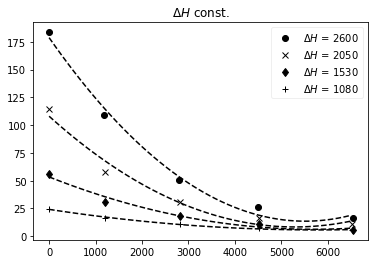

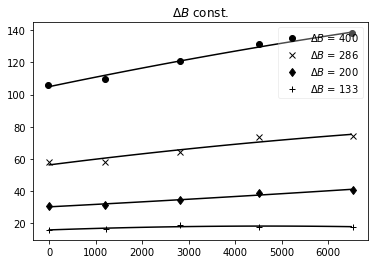

In [19]:
import matplotlib.pyplot as plt

markers = ['o', 'x', 'd', '+']
x = np.linspace(0, 6500)

for key, m in zip(poly_dH, markers):
    poly = poly_dH[key]
    y = poly(x)
    p = plt.plot(x, y, 'k--')
    plt.plot(coord_dH[key][0], coord_dH[key][1], 'k%s ' % m, label='$\Delta H$ = %d' % key)
plt.title('$\Delta H$ const.')
plt.legend(framealpha=.3)
plt.show()

for key, m in zip(poly_dB, markers):
    poly = poly_dB[key]
    y = poly(x)
    plt.plot(x, y, 'k-')
    plt.plot(coord_dB[key][0], coord_dB[key][1], 'k%s ' % m, label='$\Delta B$ = %d' % key)
plt.title('$\Delta B$ const.')
plt.legend(framealpha=.3)
plt.show()

In [29]:
# Checking the deltaB mapped more closelly to the calculated

keys_poly_dB = np.array(list(poly_dB.keys()))

deltaB_more_closely_ind = np.argmin(keys_poly_dB*1e-3 - deltaB)
deltaB_more_closely = keys_poly_dB[deltaB_more_closely_ind]; deltaB_more_closely

133

In [33]:
poly_more_closely = poly_dB[deltaB_more_closely]
power_loss = poly_more_closely(H0); power_loss

-8.936641341812194

## Second method: 

In [ ]:
P = 2 * Ve * fo * np.sum(S)